In [8]:
import numpy as np
from scipy.io import wavfile
import warnings
import matplotlib.pyplot as plt
from scipy.fftpack import fft
import winsound
import time

'''
make getfftattimeslice(time slice)
make rootfind(fftslice)
then make map that maps frequencies to notes
then map to midi

'''
warnings.simplefilter("ignore", category=wavfile.WavFileWarning)

def get_fft_at_slice(start, duration, path, plot):

   fs, data = wavfile.read(path)
   time_slice = duration
   start_samples = int(start*fs)
   num_samples = int(time_slice * fs)

   transform_data = data[start_samples:start_samples + num_samples]
   a = transform_data.T[0]
   b = [(ele / 2 ** 8.) * 2 - 1 for ele in a]
   c = fft(b)
   d = int(len(c) / 2)

   if plot:
       d = 2000
       plt.plot(abs(c[:(d - 1)]), 'r')
       plt.show()
       return abs(c[:(d - 1)])
   else:
       return abs(c[:(d - 1)])
#def secant_method(list):
#def gradient_descent(array, guess):
def simple_localmax(arr, slope_thresh, index, floor):
   if arr[index+1]-arr[index] < slope_thresh and arr[index] >floor:
       return index
   elif arr[index+1]-arr[index] < 0:
       return simple_localmax(arr, slope_thresh, index + 1, floor)
   else:
       return simple_localmax(arr, slope_thresh, index - 1, floor)

def brute_force_max(arr):
   start_time = time.time()
   index = 0
   max = 0
   for i in range(0, arr.size):
       if int(arr[i]) > max:
           index = i
           max = arr[i]
   end_time = time.time()
   elapsed_time = end_time - start_time
   print(f"Elapsed time brute force: {elapsed_time} seconds")
   return index

In [19]:
from midiutil.MidiFile import MIDIFile
from midi2audio import FluidSynth

import random
import os
def get_random_pitch():
    c3_note = 48
    c5_note = 72
    random_pitch = random.randint(c3_note, c5_note)
    return random_pitch
def generate_random_wavs(num):
    prefix = "midi_"
    for i in range(0, num):
        mf = MIDIFile(1)
        track = 0
        time = 0
        mf.addTrackName(track, time, "Sample Track")
        mf.addTempo(track, time, 120)
        channel = 0
        volume = 120
        t = 0
        num_notes = 20
        for x in range(0, num_notes):
            pitch = get_random_pitch()
            time = t
            add = random.randint(1, 3)
            duration = add
            t += add
            mf.addNote(track, channel, pitch, time, duration, volume)

        midi_filename = "midi/" + prefix + str(i) + ".mid"
        with open(midi_filename, 'wb') as outf:
            mf.writeFile(outf)
        my_file = midi_filename
        base=os.path.splitext(my_file)[0]
        
generate_random_wavs(20)

In [24]:
from midiutil.MidiFile import MIDIFile
from midi2audio import FluidSynth

import random
import os
def get_random_pitch():
    c3_note = 48
    c5_note = 72
    random_pitch = random.randint(c3_note, c5_note)
    return random_pitch
def generate_random_wavs(num):
    prefix = "midi_"
    pitch = 50
    for i in range(0, num):
        mf = MIDIFile(1)
        track = 0
        time = 0
        mf.addTrackName(track, time, "Sample Track")
        mf.addTempo(track, time, 120)
        channel = 0
        volume = 120
        t = 0
        num_notes = 20
        for x in range(0, num_notes):
            pitch += 1
            time = t
            add = 1
            duration = add
            t += add
            mf.addNote(track, channel, pitch, time, duration, volume)

        midi_filename = "midi_prog.mid"
        with open(midi_filename, 'wb') as outf:
            mf.writeFile(outf)
        my_file = midi_filename
        base=os.path.splitext(my_file)[0]
        
generate_random_wavs(1)

Elapsed time brute force: 0.0009987354278564453 seconds
Elapsed time brute force: 0.0009996891021728516 seconds
Elapsed time brute force: 0.0009999275207519531 seconds
Elapsed time brute force: 0.0019998550415039062 seconds
Elapsed time brute force: 0.0009963512420654297 seconds
Elapsed time brute force: 0.0010001659393310547 seconds
Elapsed time brute force: 0.0020020008087158203 seconds
Elapsed time brute force: 0.001997232437133789 seconds
Elapsed time brute force: 0.001999378204345703 seconds
Elapsed time brute force: 0.0 seconds
Elapsed time brute force: 0.0 seconds
Elapsed time brute force: 0.0009999275207519531 seconds
Elapsed time brute force: 0.0010097026824951172 seconds
Elapsed time brute force: 0.0009951591491699219 seconds
Elapsed time brute force: 0.0009996891021728516 seconds
Elapsed time brute force: 0.001997709274291992 seconds
Elapsed time brute force: 0.0024499893188476562 seconds
Elapsed time brute force: 0.0019986629486083984 seconds
Elapsed time brute force: 0.0 s

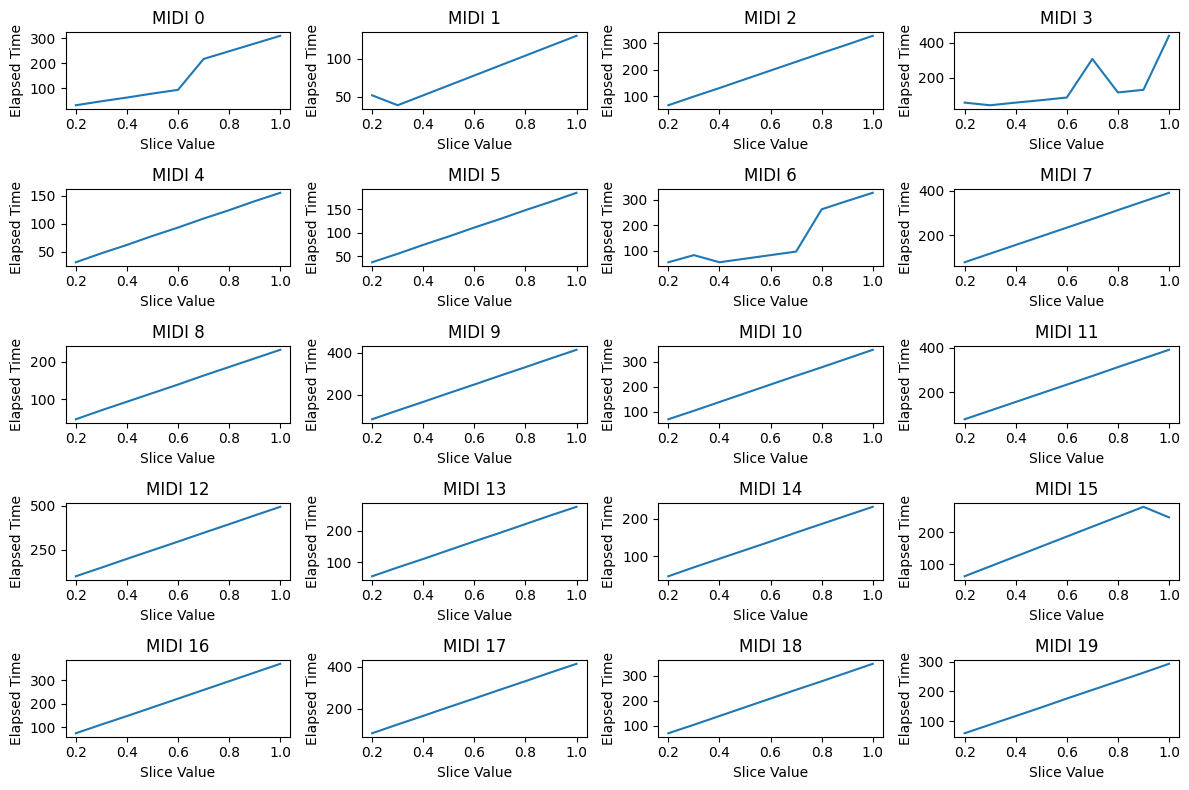

In [13]:
import matplotlib.pyplot as plt

slice_values = [0.1 * i for i in range(2, 11)]
midi_files = ['./midi/midi_' + str(i) + '.wav' for i in range(20)]
num_midi_files = len(midi_files)

plt.figure(figsize=(12, 8))

for i, midi_file in enumerate(midi_files):
    elapsed_times = []
    for slice_value in slice_values:
        slice_data = get_fft_at_slice(0, slice_value, midi_file, plot=False)
        freq = brute_force_max(slice_data)
        elapsed_times.append(freq)
    
    plt.subplot(5, 4, i+1)  # Grid of 5 rows and 4 columns
    plt.plot(slice_values, elapsed_times)
    plt.xlabel('Slice Value')
    plt.ylabel('Elapsed Time')
    plt.title('MIDI {}'.format(i))
    plt.tight_layout()

plt.show()
